In [77]:
# Dependencies
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer


In [78]:
df = pd.read_json("new.json", encoding='utf-8')
df.tail()


,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
41624,False,"[FreeHongKong, antiELAB, HongKongPolice, IPPTV...",[],False,False,8,[https://youtu.be/mUQ321Otj4c],,0,[],...,ukasz65520827,Na bieżąco informacje z Hongkongu...\n#FreeHon...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-29 21:37:17,2019-07-29 21:37:17,1155955477349425152,/ukasz65520827/status/1155955477349425157,988575155046756352,Łukasz Dobrowolski,
41625,False,[HongKongProtest],[],False,False,0,[https://twitter.com/tictoc/status/11557805267...,,0,[],...,TheRedMantisEye,Study up fellow Debt Slaves. \n#HongKongProtes...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-29 21:35:27,2019-07-29 21:35:27,1155955016466722816,/TheRedMantisEye/status/1155955016466722831,797543498585174016,FREE ENERGY Ends Central Bank Tyranny,
41626,True,"[PrayForHongkong, antiELAB, HongKongProtest, H...",[https://pbs.twimg.com/media/EArGp8JU8AIH6i6.j...,False,False,2,[],,0,[],...,wolfly6971,勿忘初心五大訴求\n香港人加油\n#PrayForHongkong\n#antiELAB\n...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-29 21:34:11,2019-07-29 21:34:11,1155954698559426560,/wolfly6971/status/1155954698559426561,2876941177,犬科撕紙王#香港加油🇭🇰,
41627,False,"[antiELAB, FreeHongKong]",[],False,False,0,[],,0,[],...,vincent_aliquo,"Hong Kong is not an ""internal affair"", it's of...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-29 21:26:15,2019-07-29 21:26:15,1155952703337426944,/vincent_aliquo/status/1155952703337426945,4346393293,Vincent Aliquo,
41628,False,[FreeHongKong],[],False,False,0,[https://twitter.com/antd/status/1155449766211...,,0,[],...,Mimi__Martini,Damn. Don't fuck with Hong Kongers. Better tha...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-29 21:22:33,2019-07-29 21:22:33,1155951771526631424,/Mimi__Martini/status/1155951771526631426,21157017,Mimi Martini,


In [179]:
df.to_csv("hkdf.csv")

In [79]:
df.columns

Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url'],
      dtype='object')

In [80]:
df.shape

(41629, 21)

In [81]:
media = df["has_media"].value_counts()

In [82]:
df["likes"].mean()

4.441615220159024

In [83]:
df["likes"].sum()

184900

In [84]:
df["screen_name"].nunique()

17281

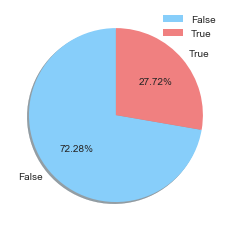

In [85]:
#Percentage of tweets that have media
colors=["lightskyblue", "lightcoral"]
# explode=(0,0,0.1)
plt.pie(media, labels=media.index, colors=colors, autopct="%1.2f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.legend(loc="upper right")


# Save Figure
# plt.savefig("x.png")

#Show Plot
plt.show()

In [86]:
# date_df = df["timestamp"]=pd.to_datetime(df["timestamp"])
# # df = df.set_index("timestamp")
# # df.drop(["date"], axis=1, inplace=True)
# # df.head()

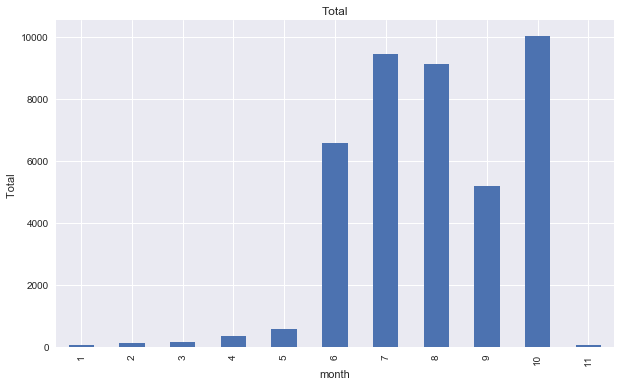

In [89]:
plt.style.use("seaborn")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].map(lambda x: x.month)
monthly = df.groupby(['month'])['likes'].count()
ax = monthly.plot.bar(figsize=(10,6), title="Total")
label = plt.ylabel("Total ")
plt.show()

# Save Figure
# plt.savefig("x.png")

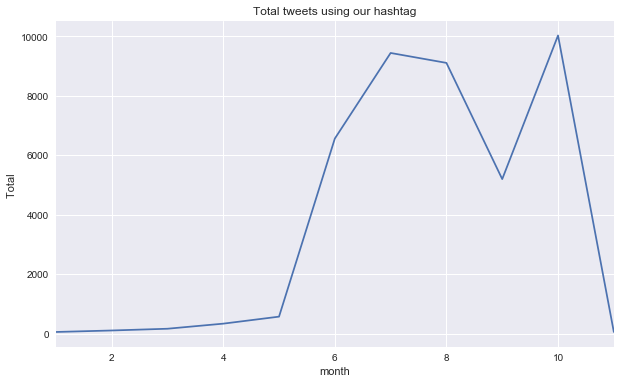

In [91]:
plt.style.use("seaborn")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].map(lambda x: x.month)
monthly = df.groupby(['month'])['likes'].count()
ax = monthly.plot.line(figsize=(10,6), title="Total tweets using our hashtag")
label = plt.ylabel("Total ")
plt.show()

# Save Figure
# plt.savefig("x.png")

### Plotly Graphing

In [167]:
#imports
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
import ipywidgets as widgets
# from scipy import special
import plotly.express as px
import plotly.offline as pyo
#Connecting notebook
plotly.offline.init_notebook_mode(connected=True)
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

4.1.0


In [177]:
# monthly.iplot(kind="scatter", filename="lineplot-with-cufflinks")


### Comparison

In [156]:
x_df = pd.read_json("tweets_XHNews.json")

In [65]:
x_df.shape

(610, 21)

### Sentiment Analysis - Doesn't work right now  - Deleted code

### Word Cloud

In [132]:
#Word cloud (unformatted)
text = df.text[10000]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [133]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()
# wordcloud.to_file("x.png")


<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [134]:
text = " ".join(review for review in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 7672361 words in the combination of all review.


In [135]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "Hong Kong", "Hongkong", "pic", "FreeHongKong"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [136]:
#Look at flag image as a numpy array
hk_mask = np.array(Image.open("logo.png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [137]:
# Transform your mask into a new one that will work with the function:
transformed_hk_mask = np.ndarray((hk_mask.shape[0],hk_mask.shape[1]), np.int32)

for i in range(len(hk_mask)):
    transformed_hk_mask[i] = list(map(transform_format, hk_mask[i]))

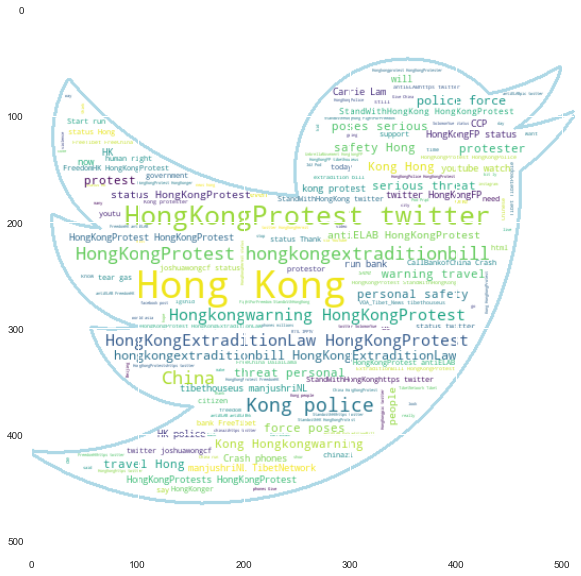

In [138]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_hk_mask,
               stopwords=stopwords, contour_width=3, contour_color='lightblue')

# Generate a wordcloud
wc.generate(text)

# store to file
# wc.to_file("X.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
plt.show()

In [139]:
#XHNews Word cloud (unformatted)
text = x_df.text[600]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
plt.show()

In [142]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()
# wordcloud.to_file("x.png")


<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [180]:
text2 = " ".join(review for review in x_df.text)
print ("There are {} words in the combination of all review.".format(len(text2)))

There are 119077 words in the combination of all review.


In [187]:
# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["https", "Hong Kong", "Hongkong", "pic", "FreeHongKong"])

# Generate a word cloud image
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [188]:
#Look at flag image as a numpy array
china_mask = np.array(Image.open("logo.png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [189]:
# Transform your mask into a new one that will work with the function:
transformed_china_mask = np.ndarray((china_mask.shape[0],china_mask.shape[1]), np.int32)

for i in range(len(hk_mask)):
    transformed_china_mask[i] = list(map(transform_format, china_mask[i]))

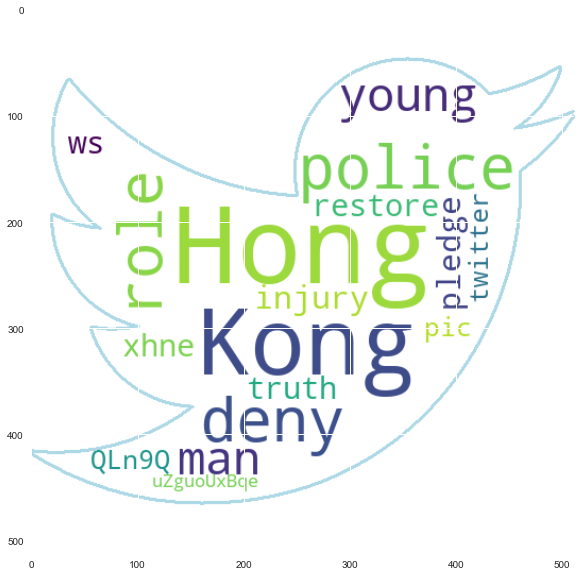

In [190]:
# Create a word cloud image
wc2 = WordCloud(background_color="white", max_words=1000, mask=transformed_china_mask,
               stopwords=stopwords, contour_width=3, contour_color='lightblue')

# Generate a wordcloud
wc2.generate(text)

# store to file
# wc2.to_file("X.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc2, interpolation='bilinear')
# plt.axis("off")
plt.show()

### Analysis